<a href="https://colab.research.google.com/github/Ankit-LASA/Data-Science/blob/main/AnkiBhasU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In my project, I wanted to answer the question: what will the Pittsburgh Panthers college football team home win rate be?

Football is an American sport where each team starts on offense or defense and attempts to score points by scoring a touchdown or making a field goal while the other team attempts to get a turnover. In most leagues, one team has to travel to their opponent's venue to play a game. Many people speculate this gives the 'home' team an advantage, but this hasn't been investigated to the same extent in college football.

The Pittsburgh Panthers is a prominent intercollegiate football team from the University of Pittsburgh in the ACC, one of the 4 large college football leagues.

In [8]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm


I did this considering the prior knowledge that another football team in the same city, the Pittsburgh Steelers in the NFL (the largest professional football team), had a 29-14 win rate (omitting ties so the data remains as a binomial) at home over the course of the last 5 seasons. I assumed that the Steelers could accurately predict the Panthers home win rate bceause both play the same sport, in the same city, in the same football field, with similar schedueles. I further made the assumption that past seasons would be sufficient to predict this season because of the similar organizational structures and coaching staffs both of them have. Obviously, due to the complexity of football, it's not that simple to isolate a home wine rate, but the wide array of similarities between the two teams makes the data reliable enough to assume they have a strong enough correlation to model the home win percentage. To demonstrate this uncertainty in the models, I divided the prior record numbers by 5.

<Axes: >

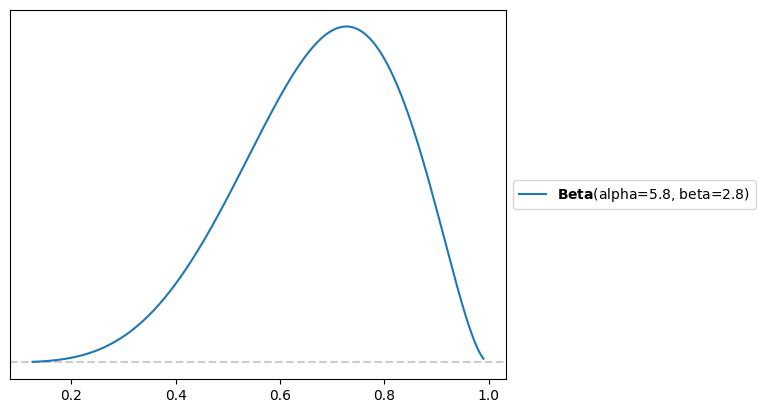

In [6]:
#plotting the beta distribution of the prior
pz.Beta(alpha=29/5,beta=14/5).plot_pdf()

I combined this knowledge about the Steelers win rate with the likelihood from data collected about the Panthers home win rate over the last 5 seasons (21-12) to try and model the future win rates. Using beta/binomial models, I calculated the posterior by finding the mean of the graph of the multiplication of the prior and likelihood.

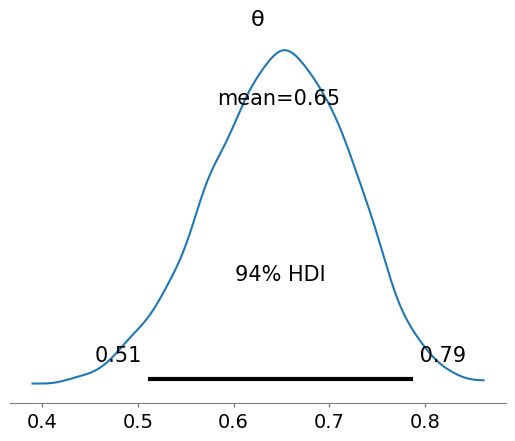

In [11]:
#this is my likelihood from past Panthers' games
FT_data_2324 = np.repeat([1,0], repeats = [21,12])
with pm.Model() as foot_FT_2324_model:
  θ = pm.Beta('θ' , alpha = 29/5. , beta = 14/5.)
  #prior from the Steelers' games
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)
  idata_FT_2324 = pm.sample(2000)
  #model 2000 times to find the mean
  az.plot_posterior(idata_FT_2324)
#this all should model the posterior

As a result, I found that the Panthers home win rate should be 65% by taking the mean of the graph.

This value doesn't match my predictions as closely as I thought they would. The fact that both teams were good over those 5 years likely drove the high home win percent figures in the data. This likely heavily distorted the sample data by including irrelevant factors other than the fact that the team was at home. In reality, the true win rate should be slighty lowered to the account for the fact that both teams are in a sort of rebuild period right now. The Steelers have just moved on to Justin Fields/Russell Wilson as their quarterbacks, while the Panthers are still gripping with the loss of Kenny Pickett as their quarterback. Those team changes inject a large amount of uncertainty in the data.

Here is the data I collected for reference:

Prior (29-14):
2023-2024: 5-4 at home, 5-3 away;
2022-2023: 4-4 at home, 5-4 away;
2021-2022: 7-2-1 at home, 2-5 away;
2020-2021: 7-1 at home, 5-3 away;
2019-2020: 5-3 at home, 3-5 away

Likelihood (21-12):
2023-2024: 3-3 at home, 0-5 away;
2022-2023: 5-2 at home, 3-2 away;
2021-2022: 5-2 at home, 5-0 away;
2020-2021: 4-2 at home, 2-3 away;
2019-2020: 4-3 at home, 3-2 away